In [1]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GROQ_API_KEY")

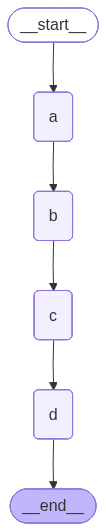

In [20]:
from IPython.display import Image, display

from typing import Any, List
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    # Note, no reducer function. 
    state: List[str]

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state": [self._value]}

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm Rao"))
builder.add_node("b", ReturnNodeValue("I'm Gupta"))
builder.add_node("c", ReturnNodeValue("I'm Mishra"))
builder.add_node("d", ReturnNodeValue("I'm Kumar"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke({"state": []})

Adding I'm Rao to []
Adding I'm Gupta to ["I'm Rao"]
Adding I'm Mishra to ["I'm Gupta"]
Adding I'm Kumar to ["I'm Mishra"]


{'state': ["I'm Kumar"]}

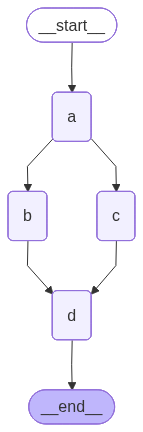

In [22]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm Rao"))
builder.add_node("b", ReturnNodeValue("I'm Gupta"))
builder.add_node("c", ReturnNodeValue("I'm Mishra"))
builder.add_node("d", ReturnNodeValue("I'm Kumar"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(f"An error occurred: {e}")

Adding I'm Rao to []
Adding I'm Gupta to ["I'm Rao"]
Adding I'm Mishra to ["I'm Rao"]
An error occurred: At key 'state': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


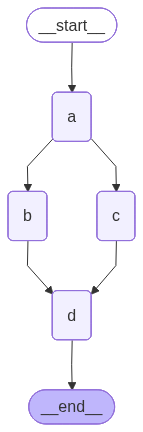

In [24]:
import operator
from typing import Annotated

class State(TypedDict):
    # The operator.add reducer fn makes this append-only
    state: Annotated[list, operator.add]

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm Rao"))
builder.add_node("b", ReturnNodeValue("I'm Gupta"))
builder.add_node("c", ReturnNodeValue("I'm Mishra"))
builder.add_node("d", ReturnNodeValue("I'm Kumar"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
graph.invoke({"state": []})

Adding I'm Rao to []
Adding I'm Gupta to ["I'm Rao"]
Adding I'm Mishra to ["I'm Rao"]
Adding I'm Kumar to ["I'm Rao", "I'm Gupta", "I'm Mishra"]


{'state': ["I'm Rao", "I'm Gupta", "I'm Mishra", "I'm Kumar"]}

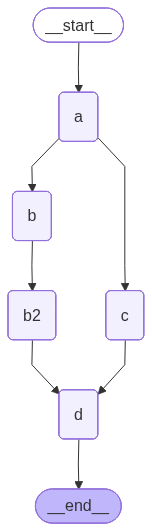

In [28]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm Rao"))
builder.add_node("b", ReturnNodeValue("I'm Gupta"))
builder.add_node("b2", ReturnNodeValue("I'm Gupta's son"))
builder.add_node("c", ReturnNodeValue("I'm Mishra"))
builder.add_node("d", ReturnNodeValue("I'm Kumar"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
graph.invoke({"state": []})

Adding I'm Rao to []
Adding I'm Gupta to ["I'm Rao"]
Adding I'm Mishra to ["I'm Rao"]
Adding I'm Gupta's son to ["I'm Rao", "I'm Gupta", "I'm Mishra"]
Adding I'm Kumar to ["I'm Rao", "I'm Gupta", "I'm Mishra", "I'm Gupta's son"]


{'state': ["I'm Rao",
  "I'm Gupta",
  "I'm Mishra",
  "I'm Gupta's son",
  "I'm Kumar"]}

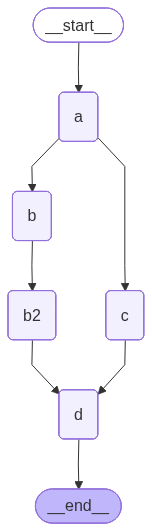

In [30]:
def sorting_reducer(left, right):
    """ Combines and sorts the values in a list"""
    if not isinstance(left, list):
        left = [left]

    if not isinstance(right, list):
        right = [right]
    
    return sorted(left + right, reverse=False)

class State(TypedDict):
    # sorting_reducer will sort the values in state
    state: Annotated[list, sorting_reducer]

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm Rao"))
builder.add_node("b", ReturnNodeValue("I'm Gupta"))
builder.add_node("b2", ReturnNodeValue("I'm Gupta's son"))
builder.add_node("c", ReturnNodeValue("I'm Mishra"))
builder.add_node("d", ReturnNodeValue("I'm Kumar"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
graph.invoke({"state": []})

Adding I'm Rao to []
Adding I'm Gupta to ["I'm Rao"]
Adding I'm Mishra to ["I'm Rao"]
Adding I'm Gupta's son to ["I'm Gupta", "I'm Mishra", "I'm Rao"]
Adding I'm Kumar to ["I'm Gupta", "I'm Gupta's son", "I'm Mishra", "I'm Rao"]


{'state': ["I'm Gupta",
  "I'm Gupta's son",
  "I'm Kumar",
  "I'm Mishra",
  "I'm Rao"]}

In [14]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-20b")

In [41]:
from typing import TypedDict, List, Annotated
import operator

class State(TypedDict):
    question: str
    context: Annotated[List[str], operator.add] 
    answer: str

In [42]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
_set_env("TAVILY_API_KEY")

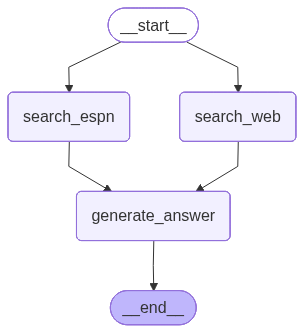

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

from langchain_community.document_loaders import WebBaseLoader
from langchain_tavily import TavilySearch 

def search_web(state):
    
    """ Retrieve docs from web search """

    # Search
    tavily_search = TavilySearch(max_results=3)
    data = tavily_search.invoke({"query": state['question']})
    search_docs = data.get("results", data)

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def search_espn(state):
    
    """ Retrieve docs from espn """

    # Search
    loader = WebBaseLoader("https://www.espn.in/")
    loader.requests_kwargs = {'verify':False}
    search_docs = loader.load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}">\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def generate_answer(state):
    
    """ Node to answer a question """

    # Get state
    context = state["context"]
    question = state["question"]

    # Template
    answer_template = """Answer the question {question} using this context: {context}"""
    answer_instructions = answer_template.format(question=question, 
                                                       context=context)    
    
    # Answer
    answer = llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"Answer the question.")])
      
    # Append it to state
    return {"answer": answer}

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("search_web",search_web)
builder.add_node("search_espn", search_espn)
builder.add_node("generate_answer", generate_answer)

# Flow
builder.add_edge(START, "search_espn")
builder.add_edge(START, "search_web")
builder.add_edge("search_espn", "generate_answer")
builder.add_edge("search_web", "generate_answer")
builder.add_edge("generate_answer", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke({"question": "What was the result of El Classico on Sunday? Can you tell a bit more about the match"}) # type: ignore
result['answer'].content

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.espn.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'**Result:**  \nReal\u202fMadrid defeated Barcelona **2–1** in the first El\u202fClásico of the season on Sunday.\n\n**Key points from the match**\n\n| Item | Details |\n|------|---------|\n| **Goal scorers** | *Real\u202fMadrid*: Kylian\u202fMbappé and Jude\u202fBellingham. *Barcelona*: (not mentioned in the provided excerpts, but the lone goal for Barça is typically attributed to a player like Pedri or a substitute). |\n| **Significance** | The win snapped Real\u202fMadrid’s four‑game losing streak against Barcelona and gave the Madrid side a vital three points in La\u202fLiga. |\n| **Controversy** | Madrid’s goalkeeper Andriy\u202fLunin was sent off after the final whistle, and a post‑match scuffle saw five players booked. Vinícius\u202fJúnior was visibly upset after a second‑half substitution, adding to the drama. |\n| **Atmosphere** | The match was billed as a “blockbuster” with high stakes for both clubs, and the tension was palpable on the pitch and in the stands. |\n\nIn short,